<a href="https://colab.research.google.com/github/tarek-moh/Jigsaw-puzzle-solver/blob/main/jigsaw_puzzle_solver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import cv2
import matplotlib.pyplot as plt
import os
import math

In [120]:
def readImage(path):
    """
    Reads an image from disk using OpenCV.

    Parameters
    ----------
    path : str
        Path to the image file.

    Returns
    -------
    numpy.ndarray or None
        The loaded image in BGR format, or None if the file does not exist.

    Notes
    -----
    - The function prints an error message if the file is not found.
    - No exception is raised when the image is missing; the caller must check for None.
    """
    if not os.path.exists(path):
        print(f"Image not found at {path}")
        return None

    return cv2.imread(path)


In [121]:
def showImage(img, pltx=5, plty=5):
    """
    Displays an image using Matplotlib.

    Parameters
    ----------
    img : numpy.ndarray
        Image array in BGR format (OpenCV default).
    pltx : int, optional
        Width of the Matplotlib figure (default: 5).
    plty : int, optional
        Height of the Matplotlib figure (default: 5).

    Notes
    -----
    - Converts BGR to RGB before displaying.
    - Prints an error message if img is None.
    """
    if img is None:
        print("Failed to load image.")
        return

    # Convert from BGR (OpenCV) to RGB (Matplotlib)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(pltx, plty))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title("Sample Image")
    plt.show()


In [122]:
def divide_image(image, number):
    """
    Divides an image into equal-sized grid pieces.

    Parameters
    ----------
    image : numpy.ndarray
        The input image to divide.
    number : int
        Total number of pieces. Must be a perfect square
        (e.g., 4 for 2x2, 9 for 3x3, 16 for 4x4).

    Returns
    -------
    list of numpy.ndarray
        A list containing each image piece in row-major order.

    Raises
    ------
    ValueError
        - If `number` is not a perfect square.
        - If the image dimensions are not divisible by the grid size.

    Example
    -------
    pieces = divide_image(img, 4)   # returns 4 equal pieces (2x2)
    """
    # Validate that number is a perfect square
    if not math.isqrt(number) == math.sqrt(number):
        raise ValueError("The 'number' of pieces must be a perfect square (e.g., 4, 9, 16).")

    grid_size = int(math.sqrt(number))
    pieces = []
    height, width, _ = image.shape

    # Validate that the image can be evenly divided
    if height % grid_size != 0 or width % grid_size != 0:
        raise ValueError("Image dimensions are not perfectly divisible by the grid size.")

    piece_height = height // grid_size
    piece_width = width // grid_size

    # Extract each piece
    for i in range(grid_size):
        for j in range(grid_size):
            y_start = i * piece_height
            y_end = (i + 1) * piece_height
            x_start = j * piece_width
            x_end = (j + 1) * piece_width

            piece = image[y_start:y_end, x_start:x_end]
            pieces.append(piece)

    return pieces


In [123]:
import numpy as np

def extract_strips(image, border=1):
    """
    Returns unified edge strips with shape (length, channels), all vertical.
    Order: [top, right, bottom, left]
    """
    # Extract raw strips
    top = image[:border, :, :]       # (b, W, C)
    bottom = image[-border:, :, :]   # (b, W, C)
    left = image[:, :border, :]      # (H, b, C)
    right = image[:, -border:, :]    # (H, b, C)

    # Rotate top/bottom to become vertical
    bottom = np.rot90(bottom, k=1)   # rotate 90deg counter-clockwise
    top = np.rot90(top, k=1)         # rotate 90deg counter-clockwise
    # left/right already vertical

    bottom = np.flip(bottom, axis=1)   # flip border dimension
    right = np.flip(right, axis=1)   # flip border dimension


    return [top, right, bottom, left]


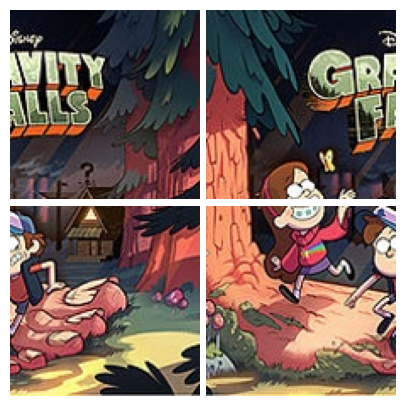

In [124]:
base_path = "./puzzles/Gravity Falls"
puzzle2x2 = readImage(f"{base_path}/puzzle_2x2/0.jpg")
pieces = divide_image(puzzle2x2, 4)

def showPieces(pieces):
  num_pieces = len(pieces)
  grid_size = int(math.sqrt(num_pieces))

  plt.figure(figsize=(4, 4))
  for i, piece in enumerate(pieces):
      plt.subplot(grid_size, grid_size, i + 1)
      plt.imshow(cv2.cvtColor(piece, cv2.COLOR_BGR2RGB))
      plt.axis('off')
  plt.tight_layout(pad=0.5)
  plt.show()

showPieces(pieces)

Image not found at Gravity Falls/puzzle_4x4/0.jpg


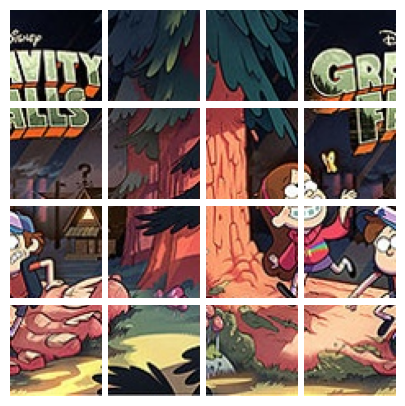

In [125]:
puzzle4x4 = readImage(f"Gravity Falls/puzzle_4x4/0.jpg")
pieces = divide_image(puzzle2x2, 16)
showPieces(pieces)

Image not found at /content/drive/MyDrive/Content/Gravity Falls/puzzle_8x8/0.jpg


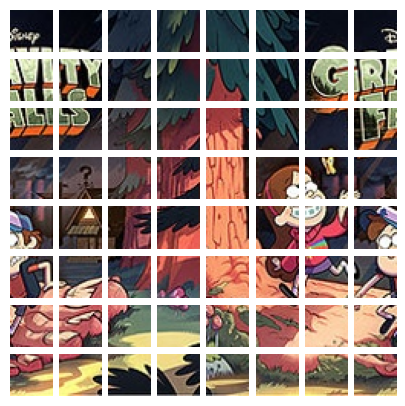

In [126]:
puzzle4x4 = readImage('/content/drive/MyDrive/Content/Gravity Falls/puzzle_8x8/0.jpg')
pieces = divide_image(puzzle2x2, 64)
showPieces(pieces)

# Example Strips of two puzzle pieces

this example containts two pieces, where the 2nd one is actually below the first piece in the correctly assembelled puzzle.

here I made the strip size equal to half of the original pieces, we can see that indeed the bottom of the upper piece matches the top of the lower piece


---


*NOTE: comparison is index wise comparision left->right*

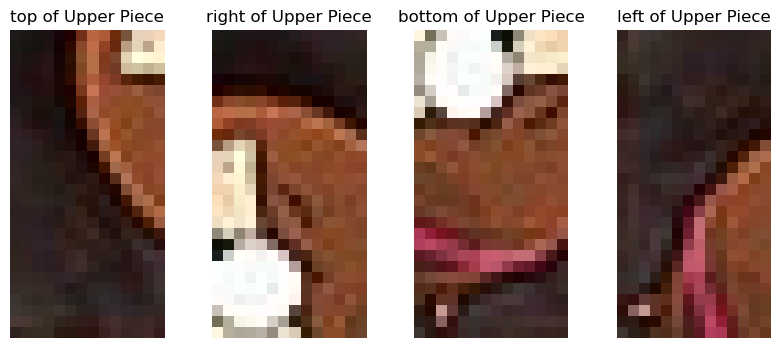

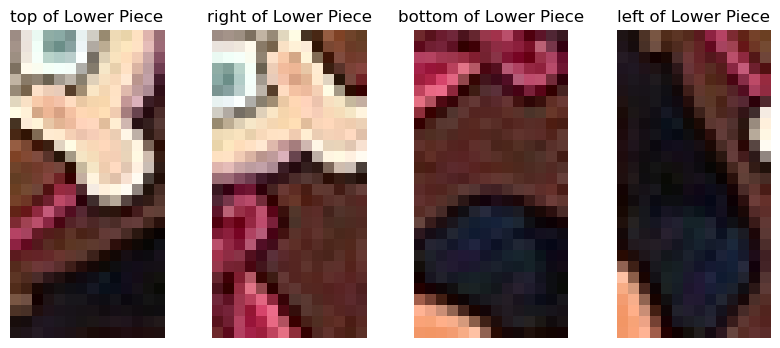

In [127]:
strips = extract_strips(pieces[29],14)
strips1 = extract_strips(pieces[37],14)
plt.figure(figsize=(10,4))

strip_names = ["top", "right", "bottom", "left"]

# Upper Piece
for i, strip in enumerate(strips):
  plt.subplot(1,4,i+1)
  plt.imshow(cv2.cvtColor(strip, cv2.COLOR_BGR2RGB))
  plt.title(strip_names[i] + " of Upper Piece")
  plt.axis('off')

# Lower Piece
plt.figure(figsize=(10,4))
for i, strip in enumerate(strips1):
  plt.subplot(1,4,i+1)
  plt.imshow(cv2.cvtColor(strip, cv2.COLOR_BGR2RGB))
  plt.title(strip_names[i] + " of Lower Piece")
  plt.axis('off')

This example containts two pieces, where the 2nd one is actually on the RHS of the first piece in the correctly assembelled puzzle.

and agian we see that the right of the left piece matches the left of the right piece

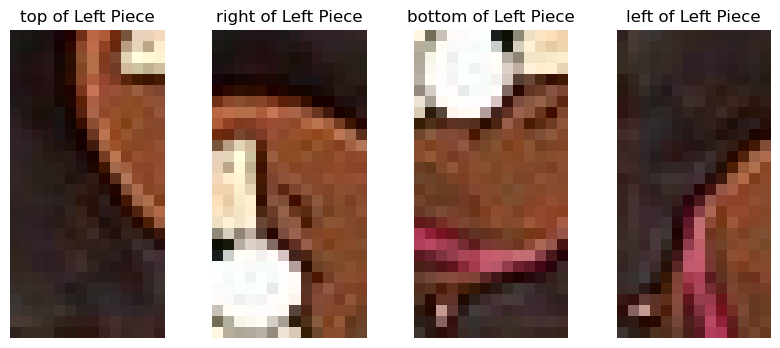

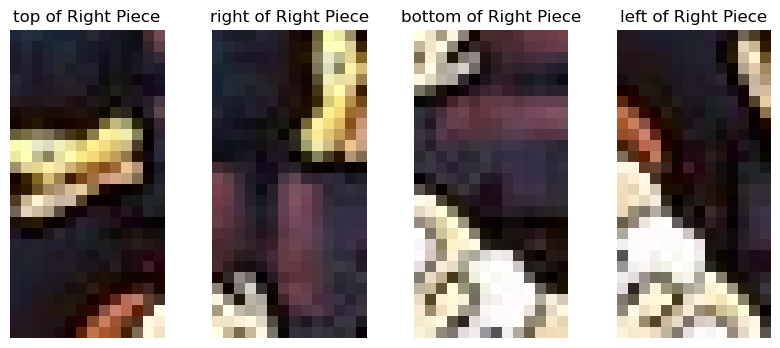

In [128]:
strips = extract_strips(pieces[29],14)
strips1 = extract_strips(pieces[30],14)
plt.figure(figsize=(10,4))

strip_names = ["top", "right", "bottom", "left"]

# Left Piece
for i, strip in enumerate(strips):
  plt.subplot(1,4,i+1)
  plt.imshow(cv2.cvtColor(strip, cv2.COLOR_BGR2RGB))
  plt.title(strip_names[i] + " of Left Piece")
  plt.axis('off')

# Right Piece
plt.figure(figsize=(10,4))
for i, strip in enumerate(strips1):
  plt.subplot(1,4,i+1)
  plt.imshow(cv2.cvtColor(strip, cv2.COLOR_BGR2RGB))
  plt.title(strip_names[i] + " of Right Piece")
  plt.axis('off')

In [129]:
def diff_squared(strip1, strip2):
    """
    Computes the squared difference between two 2D RGB strips.
    Both strips must be the same shape: (N, 3).

    Returns:
        The sum of squared differences (SSD) as a number.
    """
    strip1 = np.asarray(strip1, dtype=np.float32)
    strip2 = np.asarray(strip2, dtype=np.float32)

    # Calculate (A - B)^2 for each RGB component and sum
    return np.sum((strip1 - strip2) ** 2)

In [130]:
from scipy.ndimage import sobel

def gradient_error(strip1, strip2):
    """
    Computes an error value indicating how well two image strips connect based on gradients.

    Parameters:
        strip1: np.ndarray
            The first image strip (H x W x C) or (H x W) for grayscale.
        strip2: np.ndarray
            The second image strip (H x W x C) or (H x W) for grayscale.
            Assumes strip1's right edge should connect to strip2's left edge.

    Returns:
        float: Mean squared error of the gradients at the connecting edge.
    """

    # If color image, convert to grayscale
    if strip1.ndim == 3:
        strip1_gray = cv2.cvtColor(strip1, cv2.COLOR_BGR2GRAY)
        strip2_gray = cv2.cvtColor(strip2, cv2.COLOR_BGR2GRAY)
    else:
        strip1_gray = strip1
        strip2_gray = strip2

    # Compute gradients along the edge
    grad1 = sobel(strip1_gray, axis=0)
    grad2 = sobel(strip2_gray, axis=0)

    # Compute mean squared error between gradients
    error = np.mean((grad1 - grad2)**2)

    return error

In [131]:
def z_score(strip):
    """
    Computes the Z-score for a strip.
    strip: numpy array of shape (H, W, 3) or (H, W)
    Returns a flattened 1D Z-scored array (for comparison)
    """

    if len(strip.shape) == 3:
        strip_gray = cv2.cvtColor(strip, cv2.COLOR_BGR2GRAY)
    else:
        strip_gray = strip.copy()


    strip_flat = strip_gray.flatten()


    mean = np.mean(strip_flat)
    std = np.std(strip_flat)
    if std == 0:
        std = 1e-6

    z = (strip_flat - mean) / std
    return z

In [132]:
def compute_corr_error(stripA, stripB):
    zA = z_score(stripA)
    zB = z_score(stripB)

    min_len = min(len(zA), len(zB))
    zA = zA[:min_len]
    zB = zB[:min_len]

    diff = zA - zB
    Euclidean_error = np.sqrt(np.sum(diff**2))
    mae_error = np.mean(np.abs(diff))
    correlation = np.sum(zA * zB) / min_len

    return Euclidean_error, mae_error, correlation

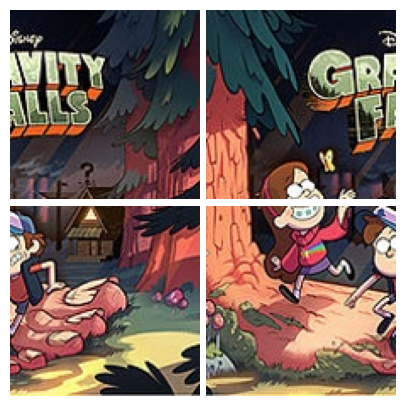

In [133]:
base_path = "./puzzles/Gravity Falls"
puzzle2x2 = readImage(f"{base_path}/puzzle_2x2/0.jpg")
pieces = divide_image(puzzle2x2, 4)

showPieces(pieces)

stripsA = extract_strips(pieces[0])
stripsB = extract_strips(pieces[2])

In [134]:
strip_names = ["top", "right", "bottom", "left"]

best_err = float('inf')
best_pair = None

print("=== DIFFERENCE ERRORS ===\n")
for i, s1 in enumerate(stripsA):
    for j, s2 in enumerate(stripsB):
        err = diff_squared(s1, s2)

        print(f"Error of image A {strip_names[i]} and image B {strip_names[j]} = {err}")

        if err < best_err:
            best_err = err
            best_pair = (strip_names[i], strip_names[j])

print("\nBest match:", best_pair, "with", best_err)

=== DIFFERENCE ERRORS ===

Error of image A top and image B top = 1084849.0
Error of image A top and image B right = 2335614.0
Error of image A top and image B bottom = 7727955.0
Error of image A top and image B left = 5769760.0
Error of image A right and image B top = 774577.0
Error of image A right and image B right = 1970918.0
Error of image A right and image B bottom = 5609981.0
Error of image A right and image B left = 4852298.0
Error of image A bottom and image B top = 298462.0
Error of image A bottom and image B right = 1542935.0
Error of image A bottom and image B bottom = 5234496.0
Error of image A bottom and image B left = 3980733.0
Error of image A left and image B top = 2541956.0
Error of image A left and image B right = 2828021.0
Error of image A left and image B bottom = 5616148.0
Error of image A left and image B left = 3373485.0

Best match: ('bottom', 'top') with 298462.0


In [135]:
strip_names = ["top", "right", "bottom", "left"]

best_err = float('inf')
best_pair = None

print("=== GRADIENT ERRORS ===\n")
for i, s1 in enumerate(stripsA):
    for j, s2 in enumerate(stripsB):
        err = gradient_error(s1, s2)

        print(f"Error of image A {strip_names[i]} and image B {strip_names[j]} = {err}")

        if err < best_err:
            best_err = err
            best_pair = (strip_names[i], strip_names[j])

print("\nBest match:", best_pair, "with", best_err)

=== GRADIENT ERRORS ===

Error of image A top and image B top = 60.0
Error of image A top and image B right = 56.285714285714285
Error of image A top and image B bottom = 42.0
Error of image A top and image B left = 64.0
Error of image A right and image B top = 59.42857142857143
Error of image A right and image B right = 53.42857142857143
Error of image A right and image B bottom = 57.714285714285715
Error of image A right and image B left = 48.285714285714285
Error of image A bottom and image B top = 52.285714285714285
Error of image A bottom and image B right = 55.714285714285715
Error of image A bottom and image B bottom = 56.0
Error of image A bottom and image B left = 52.0
Error of image A left and image B top = 59.142857142857146
Error of image A left and image B right = 53.42857142857143
Error of image A left and image B bottom = 58.285714285714285
Error of image A left and image B left = 59.142857142857146

Best match: ('top', 'bottom') with 42.0


In [136]:
strip_names = ["top", "right", "bottom", "left"]

best_err = float('inf')
best_pair = None

print("=== Z-SCORE ERRORS ===\n")
for i, s1 in enumerate(stripsA):
    for j, s2 in enumerate(stripsB):
        euc_err, mae_err, corr = compute_corr_error(s1, s2)
        err=mae_err

        print(f"Error of image A {strip_names[i]} and image B {strip_names[j]} = {err}")

        if err < best_err:
            best_err = err
            best_pair = (strip_names[i], strip_names[j])

print("\nBest match:", best_pair, "with", best_err)

=== Z-SCORE ERRORS ===

Error of image A top and image B top = 1.337576156387841
Error of image A top and image B right = 1.080699448473825
Error of image A top and image B bottom = 1.7133562362999324
Error of image A top and image B left = 1.036451048349654
Error of image A right and image B top = 1.05699558498844
Error of image A right and image B right = 0.9242217978981966
Error of image A right and image B bottom = 1.037133423524622
Error of image A right and image B left = 1.1281260835361366
Error of image A bottom and image B top = 0.6319533233359035
Error of image A bottom and image B right = 1.0372584529241646
Error of image A bottom and image B bottom = 1.1923219972879529
Error of image A bottom and image B left = 1.0476164558046224
Error of image A left and image B top = 0.9948900464822613
Error of image A left and image B right = 1.0174427816131266
Error of image A left and image B bottom = 1.44858680179891
Error of image A left and image B left = 0.8954651498691908

Best ma